In [108]:
import os
import numpy as np
import seaborn as sns
import matplotlib
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
from keras.utils import np_utils
from numpy import genfromtxt
#from learning_model import *
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
%matplotlib inline

Read raw data with zone(from kmeans clustering result)
===

In [87]:
train_part_test = np.genfromtxt('./zone_result/set33_part_train.csv', delimiter=',')
pixel_pos = np.genfromtxt('./src/pixel_pos.csv', delimiter=',')
#print (train_part_test)
#print (pixel_pos[1:,:])

PCI training
===

In [88]:
X = train_part_test[:,0:2]
y = train_part_test[:,2]
#y = np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#print(X_train)
modelClassifier = KNeighborsClassifier(n_neighbors=3)
#modelClassifier = DecisionTreeClassifier()
#modelClassifier = MLPClassifier(solver='adam', alpha=1e-5,
#                                hidden_layer_sizes=(100, 1), random_state=1)
#
'''
modelClassifier = Sequential()
modelClassifier.add(Dense(128, activation='relu', input_dim = 2))
modelClassifier.add(Dense(128, activation='relu'))
modelClassifier.add(Dense(128, activation='relu'))
modelClassifier.add(Dense(128, activation='relu'))
modelClassifier.add(Dense(1,activation='relu'))
modelClassifier.compile(loss='mean_squared_error', optimizer='adam')
modelClassifier.fit(X_train, y_train, nb_epoch=nb_epoch, batch_size=16, shuffle=True)
'''
modelClassifier.fit(X_train, y_train)
y_pred = modelClassifier.predict(X_test)
print(y_pred)
print(len(y_pred))
#print(y_test)
#print(len(y_test))
n_accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]: 
        n_accuracy = n_accuracy+1
print ("n_accuracy_pci==",n_accuracy)
print ("len(pci_pred)==",len(y_pred))
acc = n_accuracy/(len(y_pred))
print('pci accuracy: ',acc )

[41. 41. 38. 41. 38. 41. 39. 40. 41. 41. 39. 41. 41. 42. 41. 41. 42. 41.]
18
n_accuracy_pci== 17
len(pci_pred)== 18
pci accuracy:  0.9444444444444444


Predict pci and plot pci map
===

In [89]:
def convert_location_data(x, y) :
    '''
    lng = a * x1 - b * y2 + c 
    lat = a * x2 + b * y1 + d

    NEMO -> indoor position value
    (840, -351) -> (96.824, 0)
    (923, -179) -> (107.068, 15.874)
    '''
    a = 0.1185
    b = -0.003
    c = -1.81
    d = 39.842
    
    lng = a * x - b * y * (-1) + c - 4
    lat = a * y * (-1) + b * x + d - 0.5
    
    
    return lng, lat

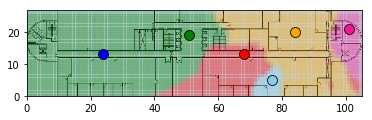

In [90]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
output = modelClassifier.predict(pixel_pos[1:,:])
#print(output)
#np.savetxt('output.csv', output, delimiter=',', fmt='%f')
pci = []
pci_input =  [37, 38, 39, 40, 41, 42, 120, 151, 154, 1, 62]
pci_config = np.array(pci_input)
f = open('./result_pci/pci_result.csv', 'w') #write the pci result into file
f.write('x,y,pci,\n')
#z = np.reshape(output, (y_resolution, x_resolution))
#z[:] = map(list,zip(*z[::-1]))
#z = np.genfromtxt('z.csv', delimiter=',')
#z_pred = np.hstack((xy, pci_map_pred))
#pci_pred = output.reshape(27,105)
z = np.reshape(output, (y_resolution, x_resolution))
#np.savetxt('z.csv', z, delimiter=',', fmt='%f')
for j in range(y_resolution):
        for i in range(x_resolution) : 
            pci = z[j][i]
            if pci == 37 :#37
                #pci_real = pci_config[0] 
                plt.plot(round(i), round(j), color='blue', marker = 's', markersize=5, alpha=.1)
            elif pci == 38 :#38
                #pci_real = pci_config[1]
                plt.plot(round(i), round(j), color='green', marker = 's', markersize=5, alpha=.1 )
            elif pci == 39 :#39
                #pci_real = pci_config[2]
                plt.plot(round(i), round(j), color='red', marker = 's', markersize=5, alpha=.1 )
            elif pci == 40:#40
                #pci_real = pci_config[3]
                plt.plot(round(i), round(j), color='skyblue', marker = 's', markersize=5, alpha=.1)
            elif pci == 41:#41
                #pci_real = pci_config[4]
                plt.plot(round(i), round(j), color='orange', marker = 's', markersize=5, alpha=.1)
            elif pci == 42:#42
                #pci_real = pci_config[5]
                plt.plot(round(i), round(j), color='deeppink', marker = 's', markersize=5, alpha=.1)
            elif pci == 120:#120
                #pci_real = pci_config[6]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 151:#151
                #pci_real = pci_config[7]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 154:#154
                #pci_real = pci_config[8]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            else :                 
                pci_real = -1
                plt.plot(round(i), round(j), color='white', marker = 's', markersize=5, alpha=.1 )
            result = str(i) + ',' + str(j) + ',' + str(pci) +',' + '\n'
            f.write(result)  # python will convert \n to os.linesep

f.close()  # you can omit in most cases as the destructor will call it
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
x, y = convert_location_data (260,215) #37
plt.plot(round(abs(x)), round(abs(y)), color='blue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

#SC1 (199, 151)
#x, y = convert_location_data (199, 868)
x, y = convert_location_data (480, 158) #38
plt.plot(round(abs(x)), round(abs(y)), color='green', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (630, 210) #39
plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='purple', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (710, 275) #40
plt.plot(round(abs(x)), round(abs(y)), color='skyblue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (765, 145) #41
plt.plot(round(abs(x)), round(abs(y)), color='orange', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

x, y = convert_location_data (908, 130) #42
plt.plot(round(abs(x)), round(abs(y)), color='deeppink', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
plt.savefig('test', dpi=200)

Generate all points with pci and zone
===

In [91]:
pci_result_zone = np.genfromtxt('./result_pci/pci_result.csv', delimiter=',')
#print (pci_result_zone)
for i in range(len(pci_result_zone)):
    pci_result_zone[:,3] = "0" 
print (pci_result_zone)
pci_result_zone_pd = pd.DataFrame(pci_result_zone,columns=['x','y','pci','zone'])
pci_result_zone_pd = pci_result_zone_pd.drop(pci_result_zone_pd.index[0])
pci_result_zone_pd.to_csv('./result_pci/pci_result_zone_pd.csv')
#print (pci_result_zone_pd)
train_part_test[:,0] = np.around(train_part_test[:,0])
train_part_test[:,1] = np.around(train_part_test[:,1])
#print (train_part_test)
train_part_test_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','zone'])
#print (train_part_test_pd)

[[ nan  nan  nan   0.]
 [  0.   0.  38.   0.]
 [  1.   0.  38.   0.]
 ...
 [102.  26.  42.   0.]
 [103.  26.  42.   0.]
 [104.  26.  42.   0.]]


Merge raw data zone and use KNN to predict points zone without real data
===

In [92]:
#print(train_part_test)
train_part_test_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','zone'])
#print (train_part_test_pd)
df = train_part_test_pd.append(pci_result_zone_pd)
#print("len(df)==",len(df))
#df = train_part_test_pd.loc[train_part_test_pd['x'].isin(pci_result_zone_pd['x']) & train_part_test_pd['y'].isin(pci_result_zone_pd['y'])]
#df1 = pci_result_zone_pd.loc[pci_result_zone_pd['x'].isin(train_part_test_pd['x']) & pci_result_zone_pd['y'].isin(train_part_test_pd['y'])]
#df = train_part_test_pd.loc[(train_part_test_pd['x'] != pci_result_zone_pd['x']) & (train_part_test_pd['y'] != pci_result_zone_pd['y'])]
#print("df==",df)
df_no_rsrp = df.drop(['rsrp'],axis=1)
#print(df_no_rsrp)
print(len(df_no_rsrp))
df_dul = df_no_rsrp.drop_duplicates(subset=['x', 'y'], keep='first', inplace=False)
print(len(df_dul))

df_dul = df_dul[['x','y','pci','zone']]
#print(df_dul)
#df = df.drop(['Unnamed: 0'],axis=1)
#df.to_csv('zone_compare1_nosort.csv')
#print(len(df))
#df_sort = df_dul.sort_values(by=['y','x'])
#df_sort.to_csv('./result_pci/zone_handle.csv')
#print("len(df_sort)==",len(df_sort))


3015
2835


/usr/local/lib/python3.5/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [93]:
df_dul_np = df_dul.values
#print(df_dul_np)
np.savetxt('./result_pci/df_dul_np_result.csv', df_dul_np, delimiter=',', fmt='%f')
X = df_dul_np[:178,0:3]
y = df_dul_np[:178,3]
#print(df_dul_np[177,0:3])
#print(df_dul_np[178,0:3])
#print(df_dul_np[179,0:3])
modelClassifier = KNeighborsClassifier(n_neighbors=3)
pci_pred = modelClassifier.fit(X, y).predict(df_dul_np[178:,0:3])
print(pci_pred)
print("===")
#print(type(pci_pred))
#print("len(pci_pred)==",len(pci_pred))
print(df_dul_np)
for i in range(len(pci_pred)):
    df_dul_np[178+i:,3] = pci_pred[i]
print (len(pci_pred))
print (df_dul_np)
np.savetxt('./result_pci/zone_knn_result.csv', pci_pred, delimiter=',', fmt='%f')
print (df_dul_np)
df_dul_sort_pd = pd.DataFrame(df_dul_np,columns=['x','y','pci','zone'])
print(type(df_dul_sort_pd))
print (df_dul_sort_pd)
df_dul_sort = df_dul_sort_pd.sort_values(by=['y','x'])
print(type(df_dul_sort))
#print (df_dul_sort.tail())
df_dul_sort.to_csv('./result_pci/zone_knn_result_sort_pd.csv')

print (df_dul_sort)

[5. 5. 5. ... 3. 3. 3.]
===
[[ 49.  24.  38.  15.]
 [ 50.  20.  38.   5.]
 [ 50.  15.  38.   5.]
 ...
 [102.  26.  42.   0.]
 [103.  26.  42.   0.]
 [104.  26.  42.   0.]]
2657
[[ 49.  24.  38.  15.]
 [ 50.  20.  38.   5.]
 [ 50.  15.  38.   5.]
 ...
 [102.  26.  42.   3.]
 [103.  26.  42.   3.]
 [104.  26.  42.   3.]]
[[ 49.  24.  38.  15.]
 [ 50.  20.  38.   5.]
 [ 50.  15.  38.   5.]
 ...
 [102.  26.  42.   3.]
 [103.  26.  42.   3.]
 [104.  26.  42.   3.]]
<class 'pandas.core.frame.DataFrame'>
          x     y   pci  zone
0      49.0  24.0  38.0  15.0
1      50.0  20.0  38.0   5.0
2      50.0  15.0  38.0   5.0
3      50.0  12.0  38.0   5.0
4      50.0  18.0  38.0   5.0
5      50.0  16.0  38.0   5.0
6      52.0  24.0  38.0  15.0
7      52.0  13.0  38.0   5.0
8      52.0  18.0  38.0   5.0
9      52.0  14.0  38.0   5.0
10     52.0  21.0  38.0   5.0
11     52.0  17.0  38.0   5.0
12     54.0  20.0  38.0   5.0
13     54.0  16.0  38.0   5.0
14     54.0  12.0  38.0   5.0
15     54.0  18.0

[[5. 5. 5. ... 1. 1. 1.]
 [5. 5. 5. ... 1. 1. 1.]
 [5. 5. 5. ... 1. 1. 1.]
 ...
 [5. 5. 5. ... 3. 3. 3.]
 [5. 5. 5. ... 3. 3. 3.]
 [5. 5. 5. ... 3. 3. 3.]]


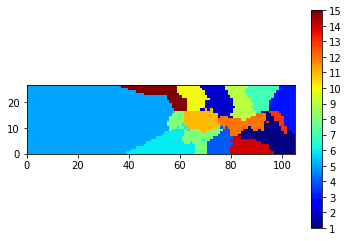

In [94]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
data_plot = (df_dul_sort.values[:,3]).reshape(27, 105)
img = plt.imread("./pic/51_5F-3.png")
print(data_plot)

plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(data_plot,cmap='jet',alpha=1)
plt.colorbar(ticks=range(16))

Draw learning curve
===

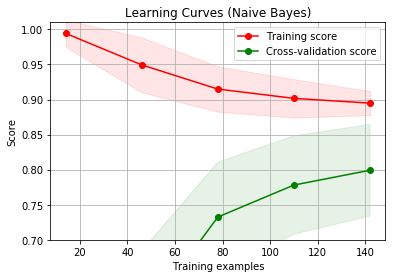

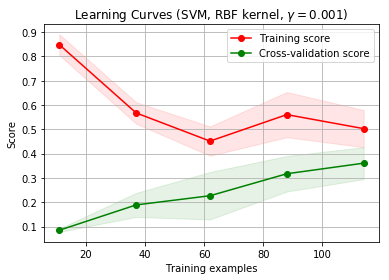

In [95]:
#def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
#                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
def plot_learning_curve(estimator, title, X, y, ylim=None,n_jobs=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
#X, y = digits.data, digits.target
#print("X==",X[0:2])
#print("y==",y[:])
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y)

plt.show()


Get raw data rsrp and do rsrp training
===

In [96]:
#::train_part_test is raw data
print(train_part_test)
#::df_dul_sort is knn result for every point
print(df_dul_sort.values)

[[  49.         24.         38.        -89.866879   15.      ]
 [  50.         20.         38.        -75.410881    5.      ]
 [  50.         15.         38.        -77.682243    5.      ]
 [  50.         12.         38.        -89.866879    5.      ]
 [  50.         18.         38.        -75.410881    5.      ]
 [  50.         16.         38.        -76.638889    5.      ]
 [  52.         24.         38.        -86.154357   15.      ]
 [  52.         13.         38.        -82.891244    5.      ]
 [  52.         18.         38.        -75.129018    5.      ]
 [  52.         14.         38.        -80.948936    5.      ]
 [  52.         21.         38.        -84.123554    5.      ]
 [  52.         17.         38.        -76.746606    5.      ]
 [  54.         20.         38.        -81.293162    5.      ]
 [  54.         16.         38.        -83.513699    5.      ]
 [  54.         12.         38.        -86.393529    5.      ]
 [  54.         18.         38.        -76.775127    5.

In [112]:
for i in range(1,16):
    print(i)
    zone = np.array([])
    zone = np.where(train_part_test[:,4] == i)
    #print(train_part_test[zone[0],:])
    print("zone == ",zone[0])
    X = train_part_test[zone[0],0:3]
    y = train_part_test[zone[0],3]
    #X = np.around(X)
    #y = np.around(y)
    #print("X==",X)
    #print("y==",y)
    #print("X==",type(X))
    #print("y==",type(y))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #print(X)
    #model = KNeighborsRegressor(n_neighbors=3,weights='uniform')
    model = KNeighborsRegressor(n_neighbors=3,weights='uniform')
    model.fit(X_train, y_train)
    title = "Learning Curves (KNN)"
    #plot_learning_curve(model, title, X_train, y_train, ylim=(0.1, 1.01))
    #plt.show()
    train_scores, valid_scores = validation_curve(Ridge(), X, y, "alpha",
                                                  np.logspace(-7, 3, 3))
    #print("train_scores==",train_scores)
    #print("valid_scores==",valid_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    print("train_scores_mean==",train_scores_mean)
    print("valid_scores_mean==",valid_scores_mean)
    #train_sizes, train_scores, valid_scores = learning_curve(model, X, y,train_sizes=np.linspace(.1, 1.0, 5), cv=5)
    #print("train_scores==",train_scores)
    #print("valid_scores==",valid_scores)
    #plot_learning_curve(model, title, X, y, ylim=(0.1, 1.01),cv=cv, n_jobs=4)
    #plt.show()

    '''
    if i==4:
        print("4")
        model = KNeighborsRegressor(n_neighbors=3,weights='distance')
    #model = MLPRegressor(solver='lbfgs', alpha=1e-5,
    #                     hidden_layer_sizes=(30,), random_state=1) 
    #model = KNeighborsRegressor(n_neighbors=3)
        model.fit(X_train, y_train)
    elif i==3:
        print("3")
        model = MLPRegressor(solver='lbfgs', alpha=1e-5,
                             hidden_layer_sizes=(30,), random_state=1) 
        model.fit(X_train, y_train)
    else:
        model = KNeighborsRegressor(n_neighbors=3,weights='distance')
        model.fit(X_train, y_train)
    '''
    filename = 'finalized_model_' + str(i) +'-' + '.sav'
    pickle.dump(model, open(filename, 'wb'))
    y_pred = model.predict(X_test)
    #print(pci_result_zone[:,2])
    zone_allpoint = np.where(df_dul_sort.values[:,3] == i)
    print (len(df_dul_sort.values))
    #predict_zone = model.predict(pci_result_zone[zone_allpoint[0],0:3])
    predict_zone = model.predict(df_dul_sort.values[zone_allpoint[0],0:3])
    #print(zone_allpoint[0]+1)
    print(len(predict_zone))
    print("RMSE with weight == ",len(predict_zone)/len(df_dul_sort.values))
    #predict_zone_every = np.append(pci_result_zone[zone_allpoint[0],0:3],predict_zone)
    name = './zone_result/zone_predict_' + str(i) +'.csv'
    df_loc = pd.DataFrame(df_dul_sort.values[zone_allpoint[0],0:3],columns=['x','y','pci'])
    df_rsrp = pd.DataFrame(predict_zone,columns=['rsrp'])
    df_result = pd.concat([df_loc,df_rsrp],axis=1)
    #print(str(i)+"==="+"df==",df)
    df_result.to_csv(name,index=False,columns=['x','y','pci','rsrp'])
    #df_result = []
    
    #np.savetxt(name, predict_zone_every, delimiter=',', fmt='%f')
    #print("X_test",X_test)
    #print("y_pred",y_pred)
    #print("predict_zone",predict_zone)
    print("[MSE]==",mean_squared_error(y_test, y_pred))
    print("[RMSE]==",mean_squared_error(y_test, y_pred)**(0.5))
    print("RMSE with weight result == ",(len(predict_zone)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred)**(0.5))
    loaded_model = pickle.load(open(filename, 'rb'))
for i in range(1,16):
    zone_predict= np.genfromtxt('./zone_result/zone_predict_' + str(i) + '.csv', delimiter=',')    
    #print(zone_predict[1:,:])
    with open('./zone_result/zone_predict_total.csv','a') as f_handle:
        np.savetxt(f_handle,zone_predict[1:,:], delimiter=',', fmt='%f')
    #df.to_csv('./zone_result/zone_predict_total.csv', mode='a', encoding='utf-8', index=False,columns=['x','y','pci','rsrp'])
zone_predict_total_np = np.genfromtxt('./zone_result/zone_predict_total.csv', delimiter=',')  
zone_predict_total_pd = pd.DataFrame(zone_predict_total_np,columns=['x','y','pci','rsrp'])
print(zone_predict_total_pd)
'''
df2 = pd.read_csv('./zone_result/zone_predict_2.csv')  
df3 = pd.read_csv('./zone_result/zone_predict_3.csv')  
df4 = pd.read_csv('./zone_result/zone_predict_4.csv')  
df5 = pd.read_csv('./zone_result/zone_predict_5.csv')
'''
#df6 = pd.read_csv('./zone_result/zone_predict_6.csv')  
#df7 = pd.read_csv('./zone_result/zone_predict_7.csv')
#df_merge_list = [df1,df2,df3,df4,df5]
#df_merge_result = pd.concat(df_merge_list)
#df_merge_result.to_csv('./zone_result/zone_predict_total_test.csv', encoding='utf-8', index=False,columns=['x','y','pci','rsrp'])
'''
    zone_allpoint = np.where(pci_result_zone[:,3] == i)
    #rint (zone_allpoint)
    print(pci_result_zone[zone_allpoint,0:3])
    predict_zone = loaded_model.predict(pci_result_zone[zone_allpoint,0:3])
    name = 'zone_predict_' + str(i) +'-' + '.csv'
    np.savetxt(name, predict_zone, delimiter=',', fmt='%f')
    result = loaded_model.score(X_test, y_test)
    #print("load result==",result)
'''

1
zone ==  [123 130 134 136 148 156 161 162 163 165 167]
train_scores_mean== [0.91401429 0.91400877 0.09050735]
valid_scores_mean== [ -8.05616557  -8.02636752 -23.94442141]
2835
172
RMSE with weight ==  0.060670194003527335
[MSE]== 16.474555865881626
[RMSE]== 4.058886037557796
RMSE with weight result ==  0.24625340333683984
2
zone ==  [ 62  66  71  72  79  80  81  86  87  88  89  91  96  98 100 104]
train_scores_mean== [0.68256737 0.68256734 0.10040184]
valid_scores_mean== [-0.05469191 -0.05370202 -7.51649437]
2835
116
RMSE with weight ==  0.04091710758377425
[MSE]== 0.05735410764555649
[RMSE]== 0.23948717636975156
RMSE with weight result ==  0.009799122560455443
3
zone ==  [170 171 172 173 175 176 177 178 179]
train_scores_mean== [0.56177485 0.56177375 0.01024175]
valid_scores_mean== [-49.23828691 -49.12647715 -33.82424362]
2835
115
RMSE with weight ==  0.04056437389770723
[MSE]== 5.025688163488446
[RMSE]== 2.241804666666667
RMSE with weight result ==  0.0909374027042916
4
zone ==  [ 

'\n    zone_allpoint = np.where(pci_result_zone[:,3] == i)\n    #rint (zone_allpoint)\n    print(pci_result_zone[zone_allpoint,0:3])\n    predict_zone = loaded_model.predict(pci_result_zone[zone_allpoint,0:3])\n    name = \'zone_predict_\' + str(i) +\'-\' + \'.csv\'\n    np.savetxt(name, predict_zone, delimiter=\',\', fmt=\'%f\')\n    result = loaded_model.score(X_test, y_test)\n    #print("load result==",result)\n'

Plot rsrp map
===

[[  0.         0.        38.       -81.396004]
 [  1.         0.        38.       -81.396004]
 [  2.         0.        38.       -81.396004]
 ...
 [102.        26.        42.       -72.061761]
 [103.        26.        42.       -70.787117]
 [104.        26.        42.       -70.787117]]
2835
zone_predict_total has been Removed!


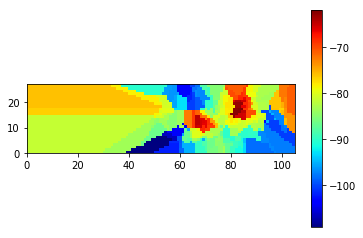

In [113]:
#df_total = pd.read_csv('./zone_result/zone_predict_total.csv')  
#print(df_total)
df_total_sort = zone_predict_total_pd.sort_values(by=['y','x'])
#print (df_total_sort)
rsrp_map_frompd = df_total_sort.values
print (rsrp_map_frompd)
print (len(rsrp_map_frompd))
rsrp_map_pd = (rsrp_map_frompd[:,3]).reshape(27, 105)
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(rsrp_map_pd,cmap='jet',alpha=1)
plt.savefig('./result_rsrp/rsrp_map.png')
plt.colorbar()
os.remove('./zone_result/zone_predict_total.csv')
print("zone_predict_total has been Removed!")

Merge to 51-5F map
===

In [ ]:
#bk = Image.open('5f_map.png')
bk = Image.open('./pic/823.PNG')
print (bk.size)
heatmap_rsrp = Image.open('./result_rsrp/rsrp_map.png')
print (heatmap_rsrp.size)
#heatmap_rsrp = heatmap_rsrp.resize((501, 130))
bk = bk.resize((432, 288))
blended = Image.blend(heatmap_rsrp, bk, alpha=0.1)
blended.save('./result_rsrp/zone_rsrp.png')